In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
df = pd.read_csv(url)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
unique_countries_count = df["country"].nunique()
print(f"There are {unique_countries_count} unique countries")

unique_continents_count = df["continent"].unique()
unique_continents = df["continent"].unique()
print(f"There are {unique_continents_count} unique continents and they are {unique_continents}")



There are 193 unique countries
There are ['AS' 'EU' 'AF' nan 'SA' 'OC'] unique continents and they are ['AS' 'EU' 'AF' nan 'SA' 'OC']


In [ ]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
df.head(7)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA


In [ ]:
df.groupby("continent").sum()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [ ]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
df.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [ ]:
df.groupby("continent")["wine_servings"].agg(["mean", "min", "max", "std", "sum"])

,mean,min,max,std,sum
continent,,,,,
AF,16.264151,0,233,38.846419,862
AS,9.068182,0,123,21.667034,399
EU,142.222222,0,370,97.421738,6400
OC,35.625000,0,212,64.555790,570
SA,62.416667,1,221,88.620189,749


now I am checking distributions per country..


In [ ]:
df['missing_continent'] = df['continent'].isnull()

In [ ]:
df["continent"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [ ]:
df[df["beer_servings"]<100]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,missing_continent
0,Afghanistan,0,0,0,0.0,AS,False
1,Albania,89,132,54,4.9,EU,False
2,Algeria,25,0,14,0.7,AF,False
7,Armenia,21,179,11,3.8,EU,False
10,Azerbaijan,21,46,5,1.3,EU,False
...,...,...,...,...,...,...,...
186,Uzbekistan,25,101,8,2.4,AS,False
187,Vanuatu,21,18,11,0.9,OC,False
190,Yemen,6,0,0,0.1,AS,False
191,Zambia,32,19,4,2.5,AF,False


In [ ]:
df[(df["beer_servings"]<100) & (df["spirit_servings"] > 100)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,missing_continent
1,Albania,89,132,54,4.9,EU,False
7,Armenia,21,179,11,3.8,EU,False
21,Bosnia-Herzegovina,76,173,8,4.6,EU,False
36,China,79,192,8,5.0,AS,False
40,Cook Islands,0,254,74,5.9,OC,False
43,Cuba,93,137,5,4.2,NaN,True
50,Dominica,52,286,26,6.6,NaN,True
72,Guyana,93,302,1,7.1,SA,False
73,Haiti,1,326,1,5.9,NaN,True
77,India,9,114,0,2.2,AS,False


In [ ]:
df[df["continent"].isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,missing_continent
0,Afghanistan,0,0,0,0.0,AS,False
1,Albania,89,132,54,4.9,EU,False
2,Algeria,25,0,14,0.7,AF,False
3,Andorra,245,138,312,12.4,EU,False
4,Angola,217,57,45,5.9,AF,False
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,False
189,Vietnam,111,2,1,2.0,AS,False
190,Yemen,6,0,0,0.1,AS,False
191,Zambia,32,19,4,2.5,AF,False


In [ ]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

array([[<AxesSubplot:title={'center':'beer_servings'}>,
        <AxesSubplot:title={'center':'spirit_servings'}>],
       [<AxesSubplot:title={'center':'wine_servings'}>,
        <AxesSubplot:title={'center':'total_litres_of_pure_alcohol'}>]],
      dtype=object)

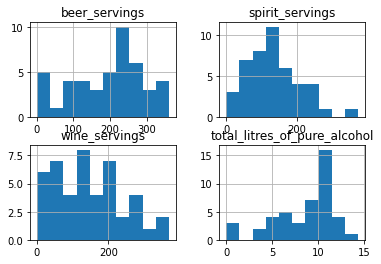

In [ ]:
df[df["continent"]=="EU"].hist()

this group is  AF
for loop number  0
         country  beer_servings  spirit_servings  wine_servings  \
2        Algeria             25                0             14   
4         Angola            217               57             45   
18         Benin             34                4             13   
22      Botswana            173               35             35   
26  Burkina Faso             25                7              7   

    total_litres_of_pure_alcohol continent  
2                            0.7        AF  
4                            5.9        AF  
18                           1.1        AF  
22                           5.4        AF  
26                           4.3        AF  
-----------------------------------------------
-----------------------------------------------
-----------------------------------------------
this group is  AS
for loop number  1
        country  beer_servings  spirit_servings  wine_servings  \
0   Afghanistan              0             

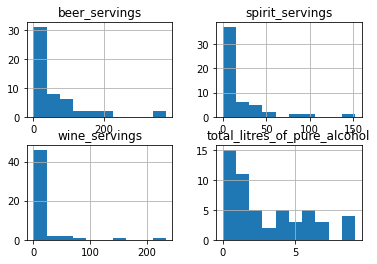

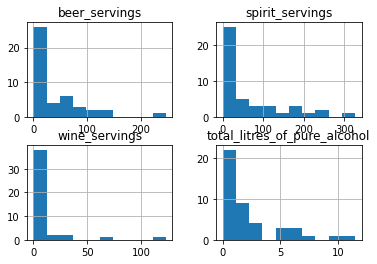

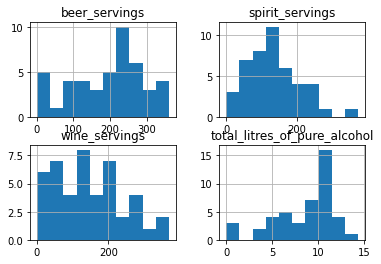

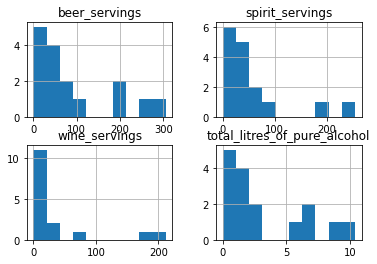

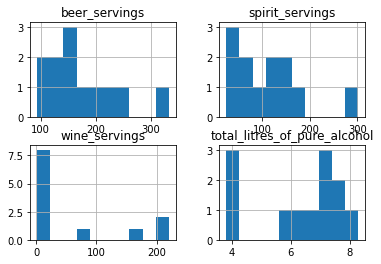

In [ ]:
i = 0
for group_id, dataframe in df.groupby("continent"):
    print("this group is ", group_id)
    print("for loop number ", i)
    print(dataframe.head())
    dataframe.hist()
    print("-----------------------------------------------")
    print("-----------------------------------------------")
    print("-----------------------------------------------")
    i += 1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>